In [1]:
import math
import numpy as np
import pandas as pd
from statistics import mean

In [90]:
def euclideanDistance(lat1,lat2, lon1,lon2):
    deglen = 110.25
    x= lat2 - lat1
    y= (lon2 - lon1)*math.cos(math.radians(lat1))
    return deglen*math.sqrt(x*x + y*y)

def greatcircle(lat1,lon1,lat2,lon2):
    radius = 6371;

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

def centroidDistance(old,new):
    return [math.sqrt((old[i][0]-new[i][0])**2+(old[i][1]-new[i][1])**2) for i in range(0,n_clusters)]

def checkEquality(old,new):
    for i in range(0,n_clusters):
        if(old[i][0]!=new[i][0] or old[i][1]!=new[i][1]):
            return False;
    return True;




In [104]:
n_clusters=5
distance="euclidean"
iterations=50
convergedistance=0.01
ic=rddlatlon.map(lambda x:(x[1],x[2])).takeSample(False, n_clusters);
outputfile=[];
outputfile.extend(ic);

for i in range(0,iterations):
    if(distance=="euclidean"):
        rddce=rddlatlon.map(lambda x:(x[0],x[1],x[2],[euclideanDistance(x[1],x[2],ic[z][0],ic[z][1]) for z in range(0,n_clusters)],np.argmin([euclideanDistance(x[1],x[2],ic[j][0],ic[j][1]) for j in range(n_clusters)])))
        rdddist=rddlatlon.map(lambda x:(np.argmin([euclideanDistance(x[1],x[2],ic[j][0],ic[j][1]) for j in range(0,n_clusters)]),(x[1],x[2])))
    elif(distance=="greatcircle"):
        rddce=rddlatlon.map(lambda x:(x[0],x[1],x[2],[greatcircle(x[1],x[2],ic[z][0],ic[z][1]) for z in range(0,n_clusters)],np.argmin([greatcircle(x[1],x[2],ic[j][0],ic[j][1]) for j in range(n_clusters)])))
        rdddist=rddlatlon.map(lambda x:(np.argmin([greatcircle(x[1],x[2],ic[j][0],ic[j][1]) for j in range(0,n_clusters)]),(x[1],x[2])))
    rddist=rdddist.groupByKey().map(lambda x:(mean([k[0] for k in x[1]]),mean([k[1] for k in x[1]]))) 
    old=ic;
    new=rddist.collect();
    if(len(new)<n_clusters):
        diff=(n_clusters-len(new));
        exclus=rddlatlon.map(lambda x:(x[1],x[2])).takeSample(False,diff);
        new.extend(exclus)
    dist=sum(centroidDistance(old,new))
    if(dist<=convergedistance or checkEquality(old,new)):
        print(dist)
        break;
    else:
        ic=new;
        outputfile.extend(ic)
        print(ic)
        
        


[(36.84001419563549, -118.5871203185235), (37.4060451401, -121.512101351), (38.255545271, -122.291884429), (34.5159028577, -117.546003246), (33.9430330109, -117.582791247)]
[(36.84001419563549, -118.5871203185235), (37.9761069189, -122.072241273), (33.1942983818, -116.509635436), (36.6064883865, -115.132919492), (32.9417843557, -110.450112632)]
[(36.84001419563549, -118.5871203185235), (37.8460238761, -121.933478286), (38.4789341666, -122.587475626), (33.8597037329, -116.917593062), (34.5096848118, -118.528024299)]
[(36.84001419563549, -118.5871203185235), (39.5505772346, -120.893183077), (39.0999645039, -119.546529616), (33.412010417, -111.483626698), (34.5579934111, -117.654332729)]
[(36.84001419563549, -118.5871203185235), (37.9883052843, -122.404670667), (43.0548211504, -122.710765192), (39.4288572959, -119.544912483), (39.5207529111, -120.731327934)]
[(36.84001419563549, -118.5871203185235), (45.2459080373, -122.287243011), (33.9688408761, -117.560385091), (37.49565112, -121.56546

In [99]:
pd.DataFrame(outputfile).to_csv('s3://mukuawsproject/clusteringcentroids.csv')

In [100]:
dfx1=rdddist.map(lambda x:(float(x[0]),x[1][0],x[1][1])).toDF().toPandas()
dfx1.columns=['index','latitude','longitude']

dfxc=pd.DataFrame(ic,columns=['latitude','longitude'])

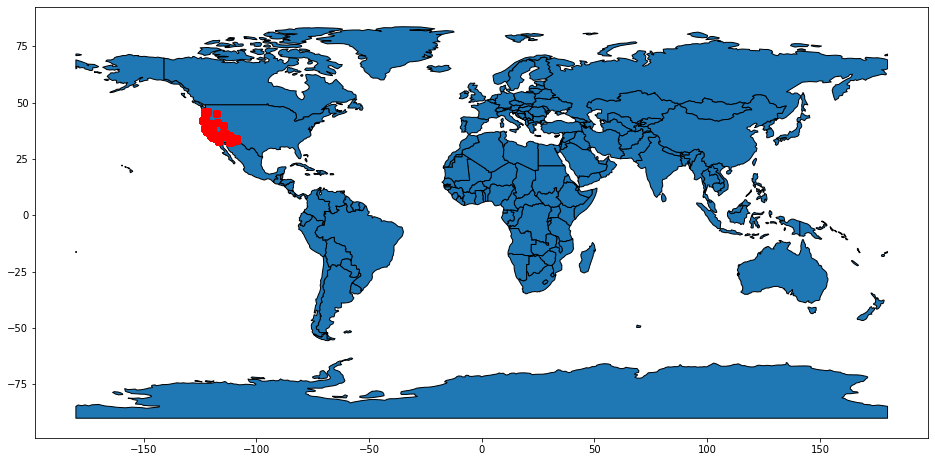

In [101]:



gdf = geopandas.GeoDataFrame(
    dfx1, geometry=geopandas.points_from_xy(dfx1.longitude, dfx1.latitude,dfx1.index))


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    edgecolor='black',figsize=(16,16))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

plt.show()

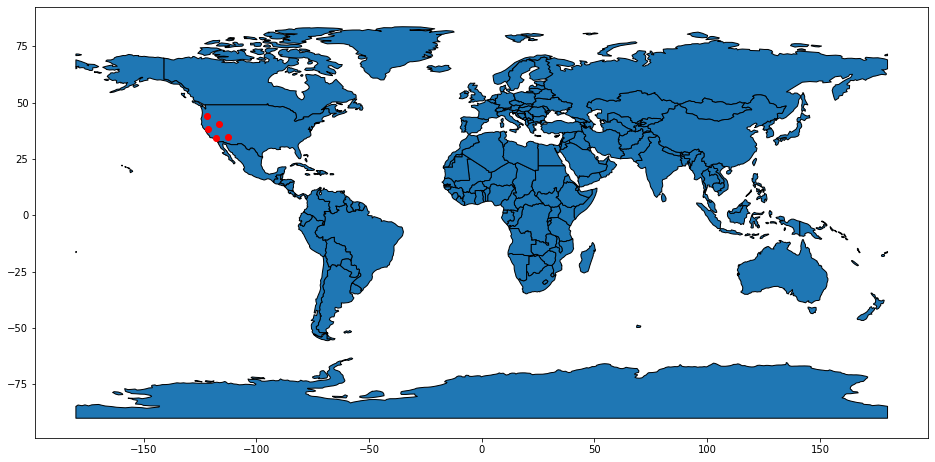

In [102]:



gdf = geopandas.GeoDataFrame(
    dfxc, geometry=geopandas.points_from_xy(dfxc.longitude, dfxc.latitude))


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    edgecolor='black',figsize=(16,16))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

plt.show()